**Project 3**

**Instructions**

Select a 12 lead ECG database (e.g. St. Petersburg INCART Database or PTB Diagnostic ECG database) from Physionet and read the dataset descriptions to identify the heart patient types (e.g MI, CAD, TIA, Other)

Load and process the dataset using python WFDB, neurokit, biosppy etc. packages

Read about the different ECG channels and pick the best channel signal e.g. V2, V5 etc.

**About the Data**


This database consists of 75 annotated recordings extracted from 32 Holter records. Each record is 30 minutes long and contains 12 standard leads, each sampled at 257 Hz, with gains varying from 250 to 1100 analog-to-digital converter units per millivolt. Gains for each record are specified in its .hea file. The reference annotation files contain over 175,000 beat annotations in all.

 
The original records were collected from patients undergoing tests for coronary artery disease (17 men and 15 women, aged 18-80; mean age: 58). None of the patients had pacemakers; most had ventricular ectopic beats. In selecting records to be included in the database, preference was given to subjects with ECGs consistent with ischemia, coronary artery disease, conduction abnormalities, and arrhythmias; observations of those selected included:

In [2]:
!pip install wfdb #native Python waveform-database (WFDB) package

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install matplotlib==3.1.3

In [1]:
import wfdb
from wfdb import processing
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
!pip install ecg-plot

In [2]:
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPool1D, ZeroPadding1D, LSTM, Bidirectional
from keras.models import Sequential, Model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

For this project, we will be downloading all the records from the "INCART" database from wfdb

In [10]:
# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'data1')

# Download all the WFDB content
wfdb.dl_database('incartdb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))


Generating record list for: I01
Generating record list for: I02
Generating record list for: I03
Generating record list for: I04
Generating record list for: I05
Generating record list for: I06
Generating record list for: I07
Generating record list for: I08
Generating record list for: I09
Generating record list for: I10
Generating record list for: I11
Generating record list for: I12
Generating record list for: I13
Generating record list for: I14
Generating record list for: I15
Generating record list for: I16
Generating record list for: I17
Generating record list for: I18
Generating record list for: I19
Generating record list for: I20
Generating record list for: I21
Generating record list for: I22
Generating record list for: I23
Generating record list for: I24
Generating record list for: I25
Generating record list for: I26
Generating record list for: I27
Generating record list for: I28
Generating record list for: I29
Generating record list for: I30
Generating record list for: I31
Generati

['I40.hea',
 'I59.hea',
 'I50.dat',
 'I46.hea',
 'I21.atr',
 'I56.atr',
 'I49.hea',
 'I23.atr',
 'I64.dat',
 'I03.dat',
 'I42.atr',
 'I32.hea',
 'I73.dat',
 'I60.dat',
 'I33.atr',
 'I56.dat',
 'I24.dat',
 'I18.dat',
 'I35.atr',
 'I07.hea',
 'I64.hea',
 'I28.dat',
 'I13.dat',
 'I72.dat',
 'I08.dat',
 'I60.atr',
 'I14.atr',
 'I54.dat',
 'I73.hea',
 'I26.atr',
 'I61.atr',
 'I21.hea',
 'I73.atr',
 'I67.hea',
 'I12.hea',
 'I55.hea',
 'I49.atr',
 'I69.dat',
 'I06.hea',
 'I49.dat',
 'I17.dat',
 'I69.atr',
 'I52.atr',
 'I66.dat',
 'I60.hea',
 'I41.atr',
 'I17.atr',
 'I58.atr',
 'I51.atr',
 'I30.dat',
 'I11.atr',
 'I65.hea',
 'I30.hea',
 'I28.atr',
 'I42.hea',
 'I52.dat',
 'I47.dat',
 'I71.dat',
 'I14.hea',
 'I61.dat',
 'I48.atr',
 'I55.dat',
 'I47.hea',
 'I39.dat',
 'I46.dat',
 'I47.atr',
 'I24.hea',
 'I34.atr',
 'I27.hea',
 'I67.dat',
 'I09.hea',
 'I02.atr',
 'I38.atr',
 'I36.dat',
 'I46.atr',
 'I01.atr',
 'I64.atr',
 'I28.hea',
 'I07.dat',
 'I19.atr',
 'I65.atr',
 'I09.atr',
 'I22.hea',
 'I2

In [15]:
# Find the list of records to consider
rec_list = list(set([os.path.splitext(x)[0] for x in os.listdir(dl_dir)]))
rec_list

['I56',
 'I23',
 'I06',
 'I54',
 'I28',
 'I72',
 'I07',
 'I27',
 'I36',
 'I73',
 'I74',
 'I01',
 'I03',
 'I44',
 'I05',
 'I14',
 'I18',
 'I35',
 'I67',
 'I02',
 'I40',
 'I60',
 'I17',
 'I66',
 'I62',
 'I45',
 'I43',
 'I46',
 'I15',
 'I47',
 'I11',
 'I32',
 'I26',
 'I65',
 'I09',
 'I68',
 'I55',
 'I30',
 'I04',
 'I21',
 'I57',
 'I34',
 'I52',
 'I39',
 'I33',
 'I08',
 'I50',
 'I12',
 'I20',
 'I13',
 'I59',
 'I29',
 'I58',
 'I75',
 'I63',
 'I19',
 'I42',
 'I53',
 'I64',
 'I31',
 'I69',
 'I22',
 'I61',
 'I37',
 'I71',
 'I24',
 'I48',
 'I25',
 'I16',
 'I51',
 'I41',
 'I10',
 'I38',
 'I49',
 'I70']

In [11]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [12]:
# add the files in a folder
files = os.listdir(dl_dir)
all_records = []
for file in files:
    record = file.split('.',1)[0]
    if record not in all_records:
        all_records.append(record)

**Checking data for single record**

In [13]:
r=[]
r1=[]
rn='I01'
signals_1, field_1 = wfdb.rdsamp('/content/data1/I01', channels=[10], sampfrom=0, sampto=500)
r.append(signals_1)
r.insert(0,rn)
r1.append(field_1)
print(r)
print(r1)

['I01', array([[1.65359477],
       [1.66013072],
       [1.67320261],
       [1.66339869],
       [1.70261438],
       [1.76470588],
       [1.7745098 ],
       [1.7875817 ],
       [1.80392157],
       [1.78104575],
       [1.72222222],
       [1.70915033],
       [1.72875817],
       [1.6503268 ],
       [1.60130719],
       [1.6372549 ],
       [1.66666667],
       [1.71568627],
       [1.76470588],
       [1.75490196],
       [1.72222222],
       [1.66993464],
       [1.63398693],
       [1.60457516],
       [1.55555556],
       [1.52614379],
       [1.49346405],
       [1.5       ],
       [1.49346405],
       [1.45098039],
       [1.41176471],
       [1.42810458],
       [1.46405229],
       [1.49346405],
       [1.48366013],
       [1.50653595],
       [1.50980392],
       [1.47058824],
       [1.48039216],
       [1.53594771],
       [1.58823529],
       [1.62091503],
       [1.64705882],
       [1.67647059],
       [1.66013072],
       [1.64379085],
       [1.63398693],
     

**Extracting the signals and fields data for all the records from the database and for the Channel V5**

The data is collected from the 12 channels which are I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5 and V6. A typical ECG graph with all the channel values is shown below.

Due to high processing time, the sample size for the records has been decreased to 500. So each record will have 500 data points recorded for the signals.

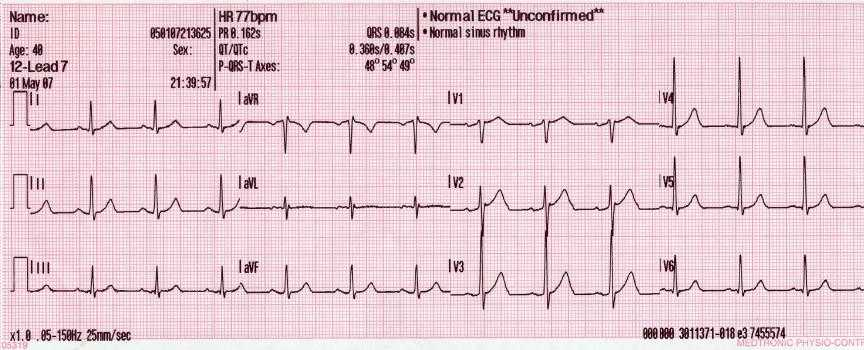

In [16]:
# Getting all the records for Channel = V5 and sample sixe 500

signals_values = []
fields_values=[]
for record in all_records:
  for rec_name in rec_list:
    signals, fields = wfdb.rdsamp('/content/data1/'+ rec_name, channels=[10], sampfrom=0, sampto=500)
    signals_values.append(signals)
    signals_values.insert(0,rec_name)
    fields_values.append(fields)
    fields_values.insert(0,rec_name)
#print(results_signals)
#print(results_fields)


In [17]:
print(len(fields_values))

11250


In [18]:
print(len(signals_values))

11250


In [51]:
# Writing all the signal values into a csv file which will be used for our analysis

csv_file = "signals_data_v5_channel_500samples.csv"
write_column = True
with open(csv_file, 'w', newline="") as csvfile:

  if write_column:
    csv_columns = signals
    writer = csv.writer(csvfile)
    writer.writerows(signals_values)


In [ ]:
# writing the field values into the csv file
fields =  ['base_date','base_time','comments','fs','n_sig','sig_len','sig_name','units']
csv_file = "Names1.csv"    
# data rows of csv file 
with open(csv_file, 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)      
    write.writeheader(fields)
    for data in dict_data:
      write.writerows(fields_values)

The field section consists of the Comments column which stores all the key information like the Diagnosis type for each patient, the heart beat type , age and gender etc., These values have been processed and loaded into a csv named 12_lead_ecg_signals_diagnosis.csv

The record descriptions for all the Patients is provided in the link

https://archive.physionet.org/physiobank/database/incartdb/record-descriptions.txt

The Patient Diagnosis details are provided in this link

https://archive.physionet.org/physiobank/database/incartdb/files-patients-diagnoses.txt

**Loading the Diagnosis data**

In [3]:
diagnosis_data=pd.read_csv("/content/sample_data/12_lead_ecg_signals_diagnosis.csv")

In [4]:
diagnosis_data

,record_name,n_sig,fs,sig_len,Age,Patient_no,Sex,Diagnosis,Heart Beat type used for diagnosis
0,I01,12,257,10000,65,1,F,CAD,"PVCs, noise"
1,I02,12,257,10000,65,1,F,CAD,"ventricular trigeminy, ventricular couplets"
2,I03,12,257,10000,59,2,M,MI,"ST elevation, PVCs"
3,I04,12,257,10000,59,2,M,MI,"bradycardia, tachycardia, PVCs, ventricular co..."
4,I05,12,257,10000,59,2,M,MI,paroxysmal VT
...,...,...,...,...,...,...,...,...,...
70,I71,12,257,10000,64,30,M,Other,"paroxysmal atrial fibrillation, WPW, bundle-br..."
71,I72,12,257,10000,73,31,M,CAD,PVCs and couplets on tachycardia
72,I73,12,257,10000,73,31,M,CAD,"PVCs on bradycardia, SVEBs, couplets"
73,I74,12,257,10000,66,32,M,MI,numerous fusion beats and PVCs on tachycardia


In [5]:
diagnosis_data.dtypes

record_name                           object
n_sig                                  int64
fs                                     int64
sig_len                                int64
Age                                    int64
Patient_no                             int64
Sex                                   object
Diagnosis                             object
Heart Beat type used for diagnosis    object
dtype: object

In [6]:
# Including a Diagnosis column to load the Diagnosis names from the reference text file
diagnosis_data['diagnosis_label']=" "

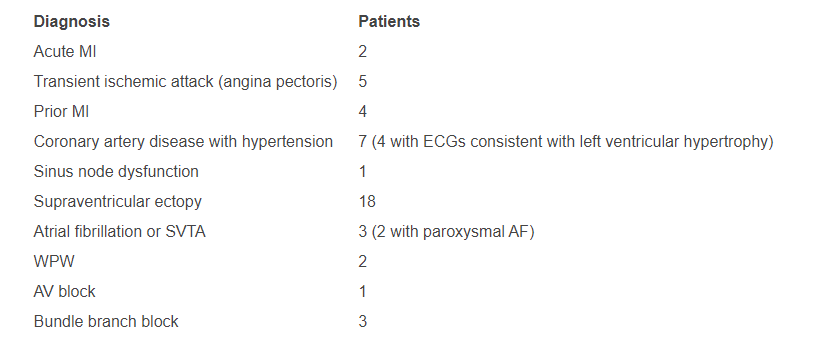

We will be categorizing these diagnosis details into 4 major classes namely CAD, MI, TIA and Others

CAD --0

MI -- 1

TIA -- 2

Others --3

In [7]:
diagnosis_data.loc[diagnosis_data['Diagnosis'] == "CAD" , 'diagnosis_label'] = 0
diagnosis_data.loc[diagnosis_data['Diagnosis'] == "MI" , 'diagnosis_label'] = 1
diagnosis_data.loc[diagnosis_data['Diagnosis'] == "TIA" , 'diagnosis_label'] = 2
diagnosis_data.loc[diagnosis_data['Diagnosis'] == "Other" , 'diagnosis_label'] = 3

In [8]:
diagnosis_data

,record_name,n_sig,fs,sig_len,Age,Patient_no,Sex,Diagnosis,Heart Beat type used for diagnosis,diagnosis_label
0,I01,12,257,10000,65,1,F,CAD,"PVCs, noise",0
1,I02,12,257,10000,65,1,F,CAD,"ventricular trigeminy, ventricular couplets",0
2,I03,12,257,10000,59,2,M,MI,"ST elevation, PVCs",1
3,I04,12,257,10000,59,2,M,MI,"bradycardia, tachycardia, PVCs, ventricular co...",1
4,I05,12,257,10000,59,2,M,MI,paroxysmal VT,1
...,...,...,...,...,...,...,...,...,...,...
70,I71,12,257,10000,64,30,M,Other,"paroxysmal atrial fibrillation, WPW, bundle-br...",3
71,I72,12,257,10000,73,31,M,CAD,PVCs and couplets on tachycardia,0
72,I73,12,257,10000,73,31,M,CAD,"PVCs on bradycardia, SVEBs, couplets",0
73,I74,12,257,10000,66,32,M,MI,numerous fusion beats and PVCs on tachycardia,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


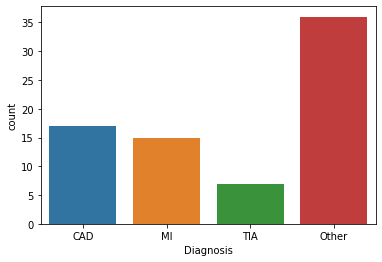

In [9]:
# Fiding the distribution of data amoung the different categories
sns.countplot(diagnosis_data['Diagnosis'])

In [10]:
diagnosis_data['Patient_no'].value_counts()

14    4
16    3
5     3
10    3
20    3
6     3
24    3
23    3
26    3
27    3
28    3
2     3
8     2
3     2
9     2
11    2
12    2
13    2
32    2
15    2
31    2
17    2
18    2
19    2
21    2
22    2
25    2
29    2
30    2
1     2
7     1
4     1
Name: Patient_no, dtype: int64

**Loading the Signals Data**

In [11]:
signals_data=pd.read_csv("/content/sample_data/signals_data_v5_channel_500samples.csv", header=None)
signals_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503
0,I26,I,2,6,0.205572,0.203650,0.204611,0.211335,0.211335,0.203650,0.206532,0.203650,0.212296,0.206532,0.219020,0.197887,0.191162,0.200768,0.196926,0.195965,0.196926,0.197887,0.197887,0.194044,0.185399,0.176753,0.178674,0.190202,0.199808,0.199808,0.197887,0.196926,0.193084,0.186359,0.196926,0.186359,0.176753,0.183477,0.197887,0.197887,...,0.232469,0.249760,0.247839,0.253602,0.256484,0.268972,0.258405,0.259366,0.259366,0.257445,0.264169,0.265130,0.264169,0.258405,0.243036,0.249760,0.243036,0.246878,0.234390,0.230548,0.234390,0.232469,0.220941,0.215178,0.218060,0.221902,0.207493,0.219020,0.217099,0.219020,0.224784,0.226705,0.219981,0.218060,0.218060,0.214217,0.218060,0.217099,0.214217,0.217099
1,I59,I,5,9,-0.460194,-0.473786,-0.479612,-0.485437,-0.487379,-0.481553,-0.479612,-0.481553,-0.481553,-0.479612,-0.473786,-0.471845,-0.469903,-0.471845,-0.499029,-0.518447,-0.526214,-0.532039,-0.535922,-0.535922,-0.533981,-0.533981,-0.539806,-0.541748,-0.537864,-0.537864,-0.555340,-0.557282,-0.547573,-0.549515,-0.559223,-0.549515,-0.549515,-0.559223,-0.565049,-0.551456,...,-0.576699,-0.576699,-0.574757,-0.584466,-0.586408,-0.594175,-0.590291,-0.590291,-0.594175,-0.592233,-0.590291,-0.594175,-0.588350,-0.584466,-0.586408,-0.590291,-0.584466,-0.578641,-0.576699,-0.578641,-0.574757,-0.572816,-0.566990,-0.559223,-0.549515,-0.545631,-0.539806,-0.535922,-0.532039,-0.533981,-0.535922,-0.537864,-0.532039,-0.528155,-0.522330,-0.524272,-0.528155,-0.524272,-0.526214,-0.530097
2,I24,I,2,4,7.380719,7.302288,7.243464,7.209150,7.225490,7.235294,7.207516,7.186275,7.218954,7.210784,7.184641,7.163399,7.135621,7.122549,7.106209,7.083333,7.060458,7.057190,7.040850,7.029412,7.001634,6.962418,6.947712,6.955882,6.923203,6.885621,6.854575,6.844771,6.830065,6.799020,6.771242,6.758170,6.756536,6.756536,6.758170,6.774510,...,7.550654,7.557190,7.552288,7.562091,7.558824,7.542484,7.544118,7.547386,7.544118,7.532680,7.529412,7.535948,7.535948,7.558824,7.568627,7.555556,7.534314,7.529412,7.529412,7.531046,7.535948,7.552288,7.557190,7.550654,7.547386,7.544118,7.550654,7.553922,7.549020,7.540850,7.532680,7.531046,7.526144,7.542484,7.545752,7.539216,7.542484,7.552288,7.542484,7.534314
3,I73,I,7,3,-4.543744,-4.528692,-4.539981,-4.549389,-4.557855,-4.556914,-4.564440,-4.562559,-4.563500,-4.569144,-4.568203,-4.574788,-4.574788,-4.572907,-4.579492,-4.582314,-4.584196,-4.587018,-4.587018,-4.589840,-4.596425,-4.600188,-4.601129,-4.604892,-4.607714,-4.611477,-4.619003,-4.617121,-4.622766,-4.625588,-4.632173,-4.631232,-4.634055,-4.641580,-4.650047,-4.651929,...,-4.532455,-4.533396,-4.529633,-4.536218,-4.535278,-4.535278,-4.530574,-4.533396,-4.534337,-4.532455,-4.531515,-4.533396,-4.534337,-4.533396,-4.535278,-4.535278,-4.533396,-4.530574,-4.534337,-4.536218,-4.532455,-4.535278,-4.534337,-4.536218,-4.531515,-4.536218,-4.536218,-4.535278,-4.531515,-4.533396,-4.531515,-4.531515,-4.532455,-4.532455,-4.530574,-4.532455,-4.534337,-4.531515,-4.531515,-4.528692
4,I44,I,4,4,0.745543,0.747164,0.747164,0.745543,0.745543,0.747164,0.743922,0.742301,0.743922,0.742301,0.742301,0.740681,0.740681,0.739060,0.739060,0.739060,0.739060,0.739060,0.740681,0.740681,0.740681,0.742301,0.740681,0.740681,0.739060,0.740681,0.743922,0.737439,0.732577,0.737439,0.750405,0.768233,0.781199,0.781199,0.786062,0.795786,...,0.787682,0.789303,0.790924,0.792545,0.795786,0.799028,0.800648,0.805511,0.810373,0.813614,0.815235,0.816856,0.816856,0.818477,0.818477,0.816856,0.815235,0.813614,0.811994,0.805511,0.799028,0.794165,0.790924,0.784441,0.781199,0.776337,0.769854,0.763371,0.760130,0.758509,0.753647,0.753647,0.750405,0.750405,0.748784,0.748784,0.750405,0.750405,0.750405,0.755267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [12]:
signals_data.drop(signals_data.columns[[1,2,3]], axis=1, inplace=True)

In [13]:
signals_data["diagnosis"]=" "

In [14]:
signals_data.rename(columns={0: 'record_name'},inplace=True)


The Diagnosis data for each record is loaded into this dataset, which will be our target value

In [15]:
signals_data.loc[signals_data['record_name'].isin(['I01','I02','I20','I21','I22','I35','I36','I37','I38','I39','I44','I45','I46','I57','I58','I72','I73']), 'diagnosis'] = 'CAD'

In [16]:
signals_data.loc[signals_data['record_name'].isin(['I03','I04','I05','I23','I24','I47','I48','I54','I55','I56','I62','I63','I64','I74','I75']), 'diagnosis'] = 'MI'

In [17]:
signals_data.loc[signals_data['record_name'].isin(['I06','I07','I15','I16','I17','I40','I41']), 'diagnosis'] = 'TIA'

In [18]:
signals_data.loc[signals_data['record_name'].isin(['I08','I09','I10','I11','I12','I13','I14','I18','I19','I25','I26','I27','I28','I29','I30','I31','I32','I33','I34','I42','I43','I49','I50',
'I51','I52','I53','I59','I60','I61','I65','I66','I67','I68','I69','I70','I71',]), 'diagnosis'] = 'Other'

In [19]:
signals_data

,record_name,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,diagnosis
0,I26,0.205572,0.203650,0.204611,0.211335,0.211335,0.203650,0.206532,0.203650,0.212296,0.206532,0.219020,0.197887,0.191162,0.200768,0.196926,0.195965,0.196926,0.197887,0.197887,0.194044,0.185399,0.176753,0.178674,0.190202,0.199808,0.199808,0.197887,0.196926,0.193084,0.186359,0.196926,0.186359,0.176753,0.183477,0.197887,0.197887,0.185399,0.175793,0.174832,...,0.249760,0.247839,0.253602,0.256484,0.268972,0.258405,0.259366,0.259366,0.257445,0.264169,0.265130,0.264169,0.258405,0.243036,0.249760,0.243036,0.246878,0.234390,0.230548,0.234390,0.232469,0.220941,0.215178,0.218060,0.221902,0.207493,0.219020,0.217099,0.219020,0.224784,0.226705,0.219981,0.218060,0.218060,0.214217,0.218060,0.217099,0.214217,0.217099,Other
1,I59,-0.460194,-0.473786,-0.479612,-0.485437,-0.487379,-0.481553,-0.479612,-0.481553,-0.481553,-0.479612,-0.473786,-0.471845,-0.469903,-0.471845,-0.499029,-0.518447,-0.526214,-0.532039,-0.535922,-0.535922,-0.533981,-0.533981,-0.539806,-0.541748,-0.537864,-0.537864,-0.555340,-0.557282,-0.547573,-0.549515,-0.559223,-0.549515,-0.549515,-0.559223,-0.565049,-0.551456,-0.553398,-0.543689,-0.537864,...,-0.576699,-0.574757,-0.584466,-0.586408,-0.594175,-0.590291,-0.590291,-0.594175,-0.592233,-0.590291,-0.594175,-0.588350,-0.584466,-0.586408,-0.590291,-0.584466,-0.578641,-0.576699,-0.578641,-0.574757,-0.572816,-0.566990,-0.559223,-0.549515,-0.545631,-0.539806,-0.535922,-0.532039,-0.533981,-0.535922,-0.537864,-0.532039,-0.528155,-0.522330,-0.524272,-0.528155,-0.524272,-0.526214,-0.530097,Other
2,I24,7.380719,7.302288,7.243464,7.209150,7.225490,7.235294,7.207516,7.186275,7.218954,7.210784,7.184641,7.163399,7.135621,7.122549,7.106209,7.083333,7.060458,7.057190,7.040850,7.029412,7.001634,6.962418,6.947712,6.955882,6.923203,6.885621,6.854575,6.844771,6.830065,6.799020,6.771242,6.758170,6.756536,6.756536,6.758170,6.774510,6.802288,6.825163,6.856209,...,7.557190,7.552288,7.562091,7.558824,7.542484,7.544118,7.547386,7.544118,7.532680,7.529412,7.535948,7.535948,7.558824,7.568627,7.555556,7.534314,7.529412,7.529412,7.531046,7.535948,7.552288,7.557190,7.550654,7.547386,7.544118,7.550654,7.553922,7.549020,7.540850,7.532680,7.531046,7.526144,7.542484,7.545752,7.539216,7.542484,7.552288,7.542484,7.534314,MI
3,I73,-4.543744,-4.528692,-4.539981,-4.549389,-4.557855,-4.556914,-4.564440,-4.562559,-4.563500,-4.569144,-4.568203,-4.574788,-4.574788,-4.572907,-4.579492,-4.582314,-4.584196,-4.587018,-4.587018,-4.589840,-4.596425,-4.600188,-4.601129,-4.604892,-4.607714,-4.611477,-4.619003,-4.617121,-4.622766,-4.625588,-4.632173,-4.631232,-4.634055,-4.641580,-4.650047,-4.651929,-4.658514,-4.662277,-4.672625,...,-4.533396,-4.529633,-4.536218,-4.535278,-4.535278,-4.530574,-4.533396,-4.534337,-4.532455,-4.531515,-4.533396,-4.534337,-4.533396,-4.535278,-4.535278,-4.533396,-4.530574,-4.534337,-4.536218,-4.532455,-4.535278,-4.534337,-4.536218,-4.531515,-4.536218,-4.536218,-4.535278,-4.531515,-4.533396,-4.531515,-4.531515,-4.532455,-4.532455,-4.530574,-4.532455,-4.534337,-4.531515,-4.531515,-4.528692,CAD
4,I44,0.745543,0.747164,0.747164,0.745543,0.745543,0.747164,0.743922,0.742301,0.743922,0.742301,0.742301,0.740681,0.740681,0.739060,0.739060,0.739060,0.739060,0.739060,0.740681,0.740681,0.740681,0.742301,0.740681,0.740681,0.739060,0.740681,0.743922,0.737439,0.732577,0.737439,0.750405,0.768233,0.781199,0.781199,0.786062,0.795786,0.807131,0.818477,0.826580,...,0.789303,0.790924,0.792545,0.795786,0.799028,0.800648,0.805511,0.810373,0.813614,0.815235,0.816856,0.816856,0.818477,0.818477,0.816856,0.815235,0.813614,0.811994,0.805511,0.799028,0.794165,0.790924,0.784441,0.781199,0.776337,0.769854,0.763371,0.760130,0.758509,0.753647,0.753647,0.750405,0.750405,0.748784,0.748784,0.75040

In [20]:
# Including a target lable value also for use in the Deep Learning models
signals_data["diagnosis_label"]=" "

In [21]:
signals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Columns: 503 entries, record_name to diagnosis_label
dtypes: float64(500), object(3)
memory usage: 21.6+ MB


In [22]:
diag_dist=signals_data['diagnosis'].value_counts()
diag_dist

Other    2700
CAD      1275
MI       1125
TIA       525
Name: diagnosis, dtype: int64

<Figure size 1440x720 with 0 Axes>

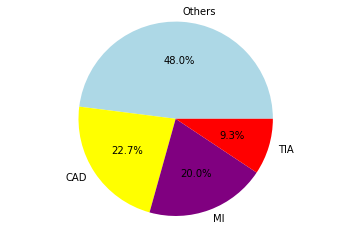

In [23]:
#pie chart of target class
diag_dist=signals_data['diagnosis'].value_counts()
plt.figure(figsize=(20,10))
fig1, ax1 = plt.subplots()
my_circle=plt.Circle( (0,0), 0.7)
ax1.pie(diag_dist,labels=['Others','CAD','MI','TIA'], colors=['lightblue','yellow','purple','red'],autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
signals_data.loc[signals_data['diagnosis'] == "CAD" , 'diagnosis_label'] = 0
signals_data.loc[signals_data['diagnosis'] == "MI" , 'diagnosis_label'] = 1
signals_data.loc[signals_data['diagnosis'] == "TIA" , 'diagnosis_label'] = 2
signals_data.loc[signals_data['diagnosis'] == "Other" , 'diagnosis_label'] = 3

In [25]:
signals_data

,record_name,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,diagnosis,diagnosis_label
0,I26,0.205572,0.203650,0.204611,0.211335,0.211335,0.203650,0.206532,0.203650,0.212296,0.206532,0.219020,0.197887,0.191162,0.200768,0.196926,0.195965,0.196926,0.197887,0.197887,0.194044,0.185399,0.176753,0.178674,0.190202,0.199808,0.199808,0.197887,0.196926,0.193084,0.186359,0.196926,0.186359,0.176753,0.183477,0.197887,0.197887,0.185399,0.175793,0.174832,...,0.247839,0.253602,0.256484,0.268972,0.258405,0.259366,0.259366,0.257445,0.264169,0.265130,0.264169,0.258405,0.243036,0.249760,0.243036,0.246878,0.234390,0.230548,0.234390,0.232469,0.220941,0.215178,0.218060,0.221902,0.207493,0.219020,0.217099,0.219020,0.224784,0.226705,0.219981,0.218060,0.218060,0.214217,0.218060,0.217099,0.214217,0.217099,Other,3
1,I59,-0.460194,-0.473786,-0.479612,-0.485437,-0.487379,-0.481553,-0.479612,-0.481553,-0.481553,-0.479612,-0.473786,-0.471845,-0.469903,-0.471845,-0.499029,-0.518447,-0.526214,-0.532039,-0.535922,-0.535922,-0.533981,-0.533981,-0.539806,-0.541748,-0.537864,-0.537864,-0.555340,-0.557282,-0.547573,-0.549515,-0.559223,-0.549515,-0.549515,-0.559223,-0.565049,-0.551456,-0.553398,-0.543689,-0.537864,...,-0.574757,-0.584466,-0.586408,-0.594175,-0.590291,-0.590291,-0.594175,-0.592233,-0.590291,-0.594175,-0.588350,-0.584466,-0.586408,-0.590291,-0.584466,-0.578641,-0.576699,-0.578641,-0.574757,-0.572816,-0.566990,-0.559223,-0.549515,-0.545631,-0.539806,-0.535922,-0.532039,-0.533981,-0.535922,-0.537864,-0.532039,-0.528155,-0.522330,-0.524272,-0.528155,-0.524272,-0.526214,-0.530097,Other,3
2,I24,7.380719,7.302288,7.243464,7.209150,7.225490,7.235294,7.207516,7.186275,7.218954,7.210784,7.184641,7.163399,7.135621,7.122549,7.106209,7.083333,7.060458,7.057190,7.040850,7.029412,7.001634,6.962418,6.947712,6.955882,6.923203,6.885621,6.854575,6.844771,6.830065,6.799020,6.771242,6.758170,6.756536,6.756536,6.758170,6.774510,6.802288,6.825163,6.856209,...,7.552288,7.562091,7.558824,7.542484,7.544118,7.547386,7.544118,7.532680,7.529412,7.535948,7.535948,7.558824,7.568627,7.555556,7.534314,7.529412,7.529412,7.531046,7.535948,7.552288,7.557190,7.550654,7.547386,7.544118,7.550654,7.553922,7.549020,7.540850,7.532680,7.531046,7.526144,7.542484,7.545752,7.539216,7.542484,7.552288,7.542484,7.534314,MI,1
3,I73,-4.543744,-4.528692,-4.539981,-4.549389,-4.557855,-4.556914,-4.564440,-4.562559,-4.563500,-4.569144,-4.568203,-4.574788,-4.574788,-4.572907,-4.579492,-4.582314,-4.584196,-4.587018,-4.587018,-4.589840,-4.596425,-4.600188,-4.601129,-4.604892,-4.607714,-4.611477,-4.619003,-4.617121,-4.622766,-4.625588,-4.632173,-4.631232,-4.634055,-4.641580,-4.650047,-4.651929,-4.658514,-4.662277,-4.672625,...,-4.529633,-4.536218,-4.535278,-4.535278,-4.530574,-4.533396,-4.534337,-4.532455,-4.531515,-4.533396,-4.534337,-4.533396,-4.535278,-4.535278,-4.533396,-4.530574,-4.534337,-4.536218,-4.532455,-4.535278,-4.534337,-4.536218,-4.531515,-4.536218,-4.536218,-4.535278,-4.531515,-4.533396,-4.531515,-4.531515,-4.532455,-4.532455,-4.530574,-4.532455,-4.534337,-4.531515,-4.531515,-4.528692,CAD,0
4,I44,0.745543,0.747164,0.747164,0.745543,0.745543,0.747164,0.743922,0.742301,0.743922,0.742301,0.742301,0.740681,0.740681,0.739060,0.739060,0.739060,0.739060,0.739060,0.740681,0.740681,0.740681,0.742301,0.740681,0.740681,0.739060,0.740681,0.743922,0.737439,0.732577,0.737439,0.750405,0.768233,0.781199,0.781199,0.786062,0.795786,0.807131,0.818477,0.826580,...,0.790924,0.792545,0.795786,0.799028,0.800648,0.805511,0.810373,0.813614,0.815235,0.816856,0.816856,0.818477,0.818477,0.816856,0.815235,0.813614,0.811994,0.805511,0.799028,0.794165,0.790924,0.784441,0.781199,0.776337,0.769854,0.763371,0.760130,0.758509,0.753647,0.753647,0.750405,0.750405,0.748784,0.748784,0.750405,0.750405,0.750405,0.75526

In [26]:
#Plotting the signal beats for a sample record
print(signals_data.iloc[0:1,0:503])

  record_name         4        5  ...       503  diagnosis  diagnosis_label
0         I26  0.205572  0.20365  ...  0.217099      Other                3

[1 rows x 503 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


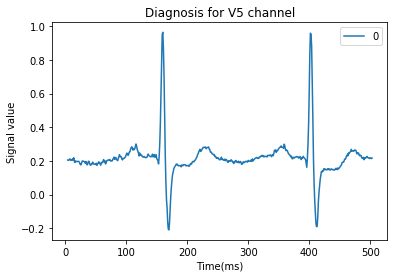

In [27]:
df = signals_data.iloc[0:1,1:501]
df_transpose = df.transpose()
print(df_transpose.plot())
plt.xlabel('Time(ms)')
plt.ylabel('Signal value')
plt.title('Diagnosis for V5 channel')
plt.show()

In [28]:
signals_data.isna().sum()

record_name        0
4                  0
5                  0
6                  0
7                  0
                  ..
501                0
502                0
503                0
diagnosis          0
diagnosis_label    0
Length: 503, dtype: int64

In [29]:
# Splitting the train and test data to fit into the Machine learning models
X=signals_data.drop(['record_name','diagnosis','diagnosis_label'], axis=1)
y=signals_data['diagnosis_label']

In [30]:
X.shape

(5625, 500)

In [31]:
y.shape

(5625,)

In [32]:
X=np.asarray(X).astype(np.float32) 
y=np.asarray(y).astype(np.float32)

In [33]:
signals_data['diagnosis_label'] = signals_data['diagnosis_label'].astype(float, errors = 'raise')

In [34]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.15)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4781, 500)
(4781,)
(844, 500)
(844,)


**ANN**

In [37]:
# class weighted neural network on an imbalanced classification dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
	# split into train and test
	n_train = 5000
	X_train, X_test = X[:n_train, :], X[n_train:, :]
	y_train, y_test = y[:n_train], y[n_train:]
	return X_train, y_train, X_test, y_test

# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# get the model
n_input = trainX.shape[1]
model = define_model(n_input)
# fit model
weights = {0:1, 1:100}
history = model.fit(trainX, trainy, epochs=100, verbose=0)
# evaluate model
yhat = model.predict(testX)
score = roc_auc_score(testy, yhat)
print('ROC AUC: %.3f' % score)
print(model.summary())

ROC AUC: 0.946
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


**Weighted imbalanced classifcation**

In [54]:

from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential
from sklearn.utils import class_weight

# prepare train and test dataset
def prepare_data():
	X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
	# split into train and test
	n_train = 3000
	X_train, X_test = X[:n_train, :], X[n_train:, :]
	y_train, y_test = y[:n_train], y[n_train:]
	return X_train, y_train, X_test, y_test


# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# get the model
n_input = trainX.shape[1]
model = define_model(n_input)
# fit model
weights = {0:1, 1:100}
history = model.fit(trainX, trainy, class_weight=weights, epochs=100, verbose=0)
# evaluate model
yhat = model.predict(testX)
score = roc_auc_score(testy, yhat)
print('ROC AUC: %.3f' % score)

print(model.summary())

ROC AUC: 0.968
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
#checking imbalance of the labels
from collections import Counter
counter_before = Counter(y)
print(counter_before)

Counter({3.0: 2700, 0.0: 1275, 1.0: 1125, 2.0: 525})


In [37]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.15)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4781, 500)
(4781,)
(844, 500)
(844,)


In [39]:
#Reshape train and test data 
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [44]:
#target_data=signals_data['diagnosis_label']
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train.shape,y_test.shape)

(4781, 4) (844, 4)


In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4781, 500, 1)
(4781,)
(844, 500, 1)
(844,)


**Convolutional Neural Network**

In [46]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [45]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (4781, 500, 1)
X Test shape:  (844, 500, 1)


In [46]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
y_train = np.array(y_train)

In [47]:
from numpy import unique
print(unique(y))

[0. 1. 2. 3.]


**Basic Sequential Model CNN (with 1 convolutional layer and 3 dense layers)**

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique

model1 = Sequential()
model1.add(Conv1D(64, 2, activation="relu", input_shape=(500,1)))
model1.add(Dense(16, activation="relu"))
model1.add(MaxPooling1D())
model1.add(Flatten())
model1.add(Dense(3, activation = 'softmax'))
model1.add(tf.keras.layers.Dense(4, activation=tf.nn.sigmoid))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 499, 64)           192       
                                                                 
 dense (Dense)               (None, 499, 16)           1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 249, 16)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3984)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 11955     
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                        

In [49]:
acc = model1.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

150/150 [==============================] - 1s 7ms/step - loss: 1.4273 - accuracy: 0.0960
Loss: 1.4273229837417603  Accuracy: 0.09600502252578735


In [81]:
model1.fit(X_train, y_train, batch_size=32,epochs=10, verbose=0)

acc = model1.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

150/150 [==============================] - 1s 7ms/step - loss: 1.2333 - accuracy: 0.4811
Loss: 1.233272671699524  Accuracy: 0.4810709059238434


**Basic Sequential Model CNN (with 3 convolutional layer and 3 dense layers)**

In [55]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 4, activation='softmax'))

In [56]:
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
acc = model1.evaluate(X_train, y_train)
print("Loss:", acc[0], " Accuracy:", acc[1])

150/150 [==============================] - 1s 7ms/step - loss: 1.2333 - accuracy: 0.4811
Loss: 1.2332738637924194  Accuracy: 0.4810709059238434


In [57]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 500, 32)           128       
                                                                 
 conv1d_5 (Conv1D)           (None, 500, 64)           6208      
                                                                 
 conv1d_6 (Conv1D)           (None, 500, 128)          24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 250, 128)         0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 250, 128)          0         
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                      

In [58]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/10
479/479 [==============================] - 50s 102ms/step - loss: 0.4916 - accuracy: 0.8017 - val_loss: 2348.0090 - val_accuracy: 0.5936
Epoch 2/10
479/479 [==============================] - 49s 102ms/step - loss: 0.0066 - accuracy: 0.9973 - val_loss: 2914.2251 - val_accuracy: 0.5675
Epoch 3/10
479/479 [==============================] - 49s 102ms/step - loss: 2.0335e-05 - accuracy: 1.0000 - val_loss: 2818.8804 - val_accuracy: 0.5675
Epoch 4/10
479/479 [==============================] - 49s 102ms/step - loss: 6.6035e-06 - accuracy: 1.0000 - val_loss: 2814.4514 - val_accuracy: 0.5675
Epoch 5/10
479/479 [==============================] - 49s 102ms/step - loss: 2.6729e-06 - accuracy: 1.0000 - val_loss: 2806.8218 - val_accuracy: 0.5675
Epoch 6/10
479/479 [==============================] - 49s 101ms/step - loss: 2.5186e-06 - accuracy: 1.0000 - val_loss: 2783.2737 - val_accuracy: 0.5675
Epoch 7/10
479/479 [==============================] - 49s 102ms/step - loss: 1.4213e-06 - accura

In [60]:
y_pred=cnn_model.predict(X_test)

In [73]:
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end1 = Dropout(0.5)(dense_end1)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    dense_end2 = Dropout(0.5)(dense_end2)
    main_output = Dense(4, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', mode='min',patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=10,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
  
    model.load_weights('best_model.h5')
    return(model,history)

In [74]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    #plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [75]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/10
150/150 [==============================] - 13s 80ms/step - loss: 1.2882 - accuracy: 0.5614 - val_loss: 2.5496 - val_accuracy: 0.6386
Epoch 2/10
150/150 [==============================] - 12s 77ms/step - loss: 0.4401 - accuracy: 0.8435 - val_loss: 4.3559 - val_accuracy: 0.7938
Epoch 3/10
150/150 [==============================] - 12s 77ms/step - loss: 0.2015 - accuracy: 0.9352 - val_loss: 38.3523 - val_accuracy: 0.6291
Epoch 4/10
150/150 [==============================] - 12s 77ms/step - loss: 0.1259 - accuracy: 0.9577 - val_loss: 95.3169 - val_accuracy: 0.6197
Epoch 5/10
150/150 [==============================] - 12s 77ms/step - loss: 0.0825 - accuracy: 0.9722 - val_loss: 182.5402 - val_accuracy: 0.6149
Epoch 6/10
150/150 [==============================] - 11s 76ms/step - loss: 0.0813 - accuracy: 0.9713 - val_loss: 241.5940 - val_accuracy: 0.6197
Epoch 7/10
150/150 [==============================] - 11s 76ms/step - loss: 0.0601 - accuracy: 0.9770 - val_loss: 230.9836 - val_a

Train: 0.481, Test: 0.639


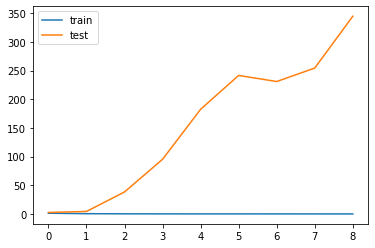

In [76]:
# evaluate the model

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Train: 0.481, Test: 0.639


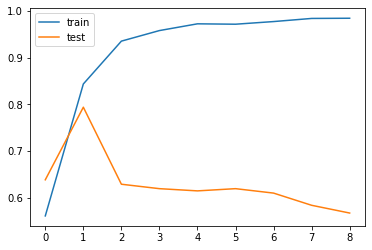

In [80]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()